## Sample Midterm Exam Questions
### For each question you are expected to write the Python code to attain the necessary graphs or results

In [4]:
# The necesary python packages have been imported
# for data structures and manipulation

import numpy as np # for mathematical caluclations
import pandas as pd 
import datetime  # to access datetime

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the plot style in matplotlib to ggplot and the firgure size to 15x5## Augmented Dickey Fuller Test for Assessing Stationarity
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,5)

# for ingnoring warnings
import warnings # to ignore warning
warnings.filterwarnings('ignore')

In [5]:
# The Netflix csv file is imported and shows the stock data for Netflix where Open,High,Low, Close and Adj Close refers to
#Netflix stock price
Netflix=pd.read_csv('Netflix.csv',parse_dates=['Date'])
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,4.217143,4.357143,4.200000,4.267143,4.267143,6605200
1,2009-01-05,4.327143,4.562857,4.302857,4.562857,4.562857,13044500
2,2009-01-06,4.591429,4.750000,4.590000,4.705714,4.705714,12065900
3,2009-01-07,4.715714,4.734286,4.571429,4.672857,4.672857,10133900
4,2009-01-08,4.618571,4.797143,4.485714,4.735714,4.735714,8175300


In [13]:
#Extract the year, month and quarter information from the dataframe and add them as new varriables to the Netflix dataframe
Netflix['Year'] = Netflix['Date'].dt.year
Netflix['Month'] = Netflix['Date'].dt.month
Netflix['Day'] = Netflix['Date'].dt.day
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2009-01-02,4.217143,4.357143,4.200000,4.267143,4.267143,6605200,2009,1,2
1,2009-01-05,4.327143,4.562857,4.302857,4.562857,4.562857,13044500,2009,1,5
2,2009-01-06,4.591429,4.750000,4.590000,4.705714,4.705714,12065900,2009,1,6
3,2009-01-07,4.715714,4.734286,4.571429,4.672857,4.672857,10133900,2009,1,7
4,2009-01-08,4.618571,4.797143,4.485714,4.735714,4.735714,8175300,2009,1,8


In [14]:
#Create a new variable, Price Range which takes the difference between the High and Low Price for the data and add it
#to the dataframe
Netflix['Price Range'] = Netflix['High'] - Netflix['Low']
Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Price Range
0,2009-01-02,4.217143,4.357143,4.200000,4.267143,4.267143,6605200,2009,1,2,0.157143
1,2009-01-05,4.327143,4.562857,4.302857,4.562857,4.562857,13044500,2009,1,5,0.260000
2,2009-01-06,4.591429,4.750000,4.590000,4.705714,4.705714,12065900,2009,1,6,0.160000
3,2009-01-07,4.715714,4.734286,4.571429,4.672857,4.672857,10133900,2009,1,7,0.162857
4,2009-01-08,4.618571,4.797143,4.485714,4.735714,4.735714,8175300,2009,1,8,0.311429


In [17]:
#Create a variable called PriceDiff which measures the difference between the opening price and the closing price
#What is the proportion of days when Netflix stock closed for a loss
Netflix['PriceDiff'] = Netflix['Open'] - Netflix['Close']
Netflix['Profit Status'] = ['Gain' if x >= 0 else 'Loss' for x in Netflix['PriceDiff']]
Netflix['Profit Status'].value_counts(normalize=True)


Profit Status
Gain    0.504971
Loss    0.495029
Name: proportion, dtype: float64

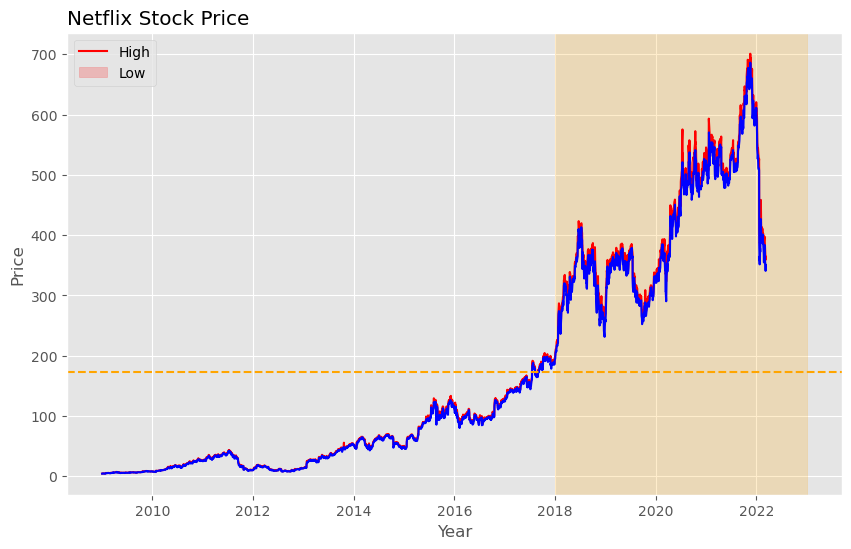

In [53]:
#Create lineplots that show Netflix's High and Low prices for the day, with linecolor red showing the low and blue the highs 
#Include the x label (year) and y label (Price)
#Include the title Netflix Stock Price and locate to the left
#Include the legends "Low" and "High"
#Include a horizontal line that shows the average (High) price of Netflix stock
#Include an orange vertical span that ranges from 2018 to 2022 with a transparency of 0.2

plt.figure(figsize = (10, 6))
sns.lineplot(data = Netflix, x = 'Date', y = 'High', color = 'Red')
sns.lineplot(data = Netflix, x = 'Date', y = 'Low', color = 'Blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Netflix Stock Price', loc='Left')
plt.axhline(y = Netflix['High'].mean(), color = 'Orange', linestyle = '--')
plt.axvspan(xmin = '2018-01-01', xmax = '2022-12-31', ymin = 0, ymax = 1, color = 'Orange', alpha = 0.2 )
plt.legend(labels = ['High', 'Low'])


In [54]:
#The dataset Health shows the Health Spending and Life Expenctancy for select countries over the years
health=pd.read_csv('healthexp.csv')
health.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [ ]:
#Create a dataframe yearly-Health that shows the average annual health spending for the countries over the years

In [55]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [59]:
yearly_health = pd.pivot_table(data = health, index = ['Country'], columns = ['Year'], values = 'Spending_USD', aggfunc = 'mean')
yearly_health

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country,,,,,,,,,,,,,,,,,,,,,
Canada,NaN,313.391,NaN,NaN,NaN,NaN,543.337,NaN,NaN,692.269,...,4228.962,4336.249,4428.753,4536.810,4635.285,5044.275,5150.470,5308.356,5189.721,5828.324
France,192.143,NaN,NaN,NaN,NaN,363.610,NaN,NaN,NaN,NaN,...,4161.698,4299.434,4544.964,4626.679,4667.156,4928.128,5005.756,5099.306,5167.839,5468.418
Germany,252.311,298.251,337.364,384.541,452.744,532.481,591.098,647.352,729.457,800.703,...,4566.678,4745.546,4951.677,5151.709,5295.975,5669.064,5970.163,6281.840,6407.928,6938.983
Great Britain,123.993,134.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3495.652,3614.131,3667.636,3758.935,3805.820,3960.141,4059.125,4189.708,4385.463,5018.700
Japan,150.437,163.854,185.390,205.778,242.018,284.269,303.725,340.628,392.577,452.931,...,3740.756,3970.765,4308.252,4328.364,4515.556,4295.858,4412.852,4554.276,4610.794,4665.641
USA,326.961,357.988,397.097,439.302,495.114,560.750,638.851,726.241,808.884,908.963,...,8079.467,8346.064,8519.620,8925.879,9355.118,9717.649,10046.472,10451.386,10855.517,11859.179


In [60]:
#Extract the health spending, Life expectancy and year for the U.S.
health[health['Country'] == 'USA'].head()

,Year,Country,Spending_USD,Life_Expectancy
4,1970,USA,326.961,70.9
9,1971,USA,357.988,71.2
12,1972,USA,397.097,71.2
15,1973,USA,439.302,71.4
18,1974,USA,495.114,72.0


In [62]:
#Show the average health spending for each country over the years.
health.groupby('Country')['Spending_USD'].mean()


Country
Canada           2685.778341
France           3045.145057
Germany          2667.280200
Great Britain    2034.192465
Japan            1860.257902
USA              4388.570529
Name: Spending_USD, dtype: float64

In [63]:
#Show the average life expectancy for each country over the years.
health.groupby('Country')['Life_Expectancy'].mean()


Country
Canada           78.706818
France           79.565714
Germany          76.726000
Great Britain    77.620930
Japan            79.554902
USA              75.843137
Name: Life_Expectancy, dtype: float64

In [66]:
#List the Health spending for the countries for 2020 from highest to lowest
health.loc[health['Year'] == 2020].sort_values(by = 'Spending_USD', ascending = False).reset_index()


,index,Year,Country,Spending_USD,Life_Expectancy
0,273,2020,USA,11859.179,77.0
1,269,2020,Germany,6938.983,81.1
2,268,2020,Canada,5828.324,81.7
3,270,2020,France,5468.418,82.3
4,271,2020,Great Britain,5018.700,80.4
5,272,2020,Japan,4665.641,84.7


In [71]:
#What is the total health spending for France in 2015?
health.loc[(health['Country'] == 'France') & (health['Year'] == 2015), 'Spending_USD'].sum()

4667.156

Text(0.5, 1.0, 'Life Expectancy vs Health Expenditures')

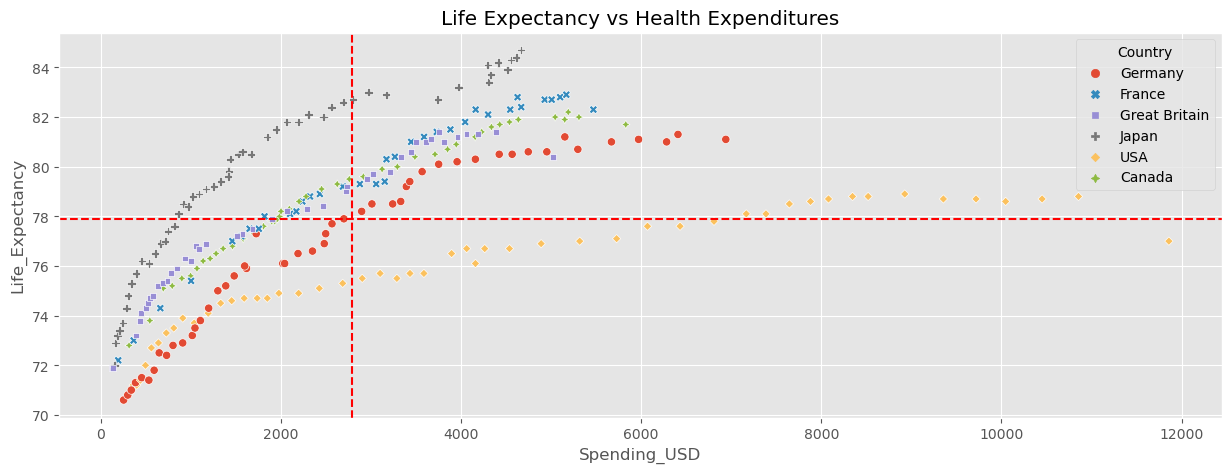

In [79]:
#Create a scatterplot that shows Health Spending on the x-axis and life-expectancy on the y-axis for all countries
#Distinguish each country by a different color and marker
#add horizontal and vertical lines to your graph to correspond to the mean life expectancy(horizontal) and
#mean spending (vertical) selecting red as the line color and 'dashed' as the linesyle
#add the title "Life Expectancy ve Health Expenditures"

sns.scatterplot(data = health, x = 'Spending_USD', y = 'Life_Expectancy', hue = 'Country', style = 'Country')
plt.axhline(y = health['Life_Expectancy'].mean(), color = 'Red', linestyle = '--')
plt.axvline(x = health['Spending_USD'].mean(), color = 'Red', linestyle = '--')
plt.title('Life Expectancy vs Health Expenditures')

In [ ]:
#Which country seems to have the largest health expenditure but relatively low life-expctancies? 
#Which country seeems to have the lowest health expenditures but relatively higher life-expectancies?

Largest health expenditures but relatively low life expectancies = USA
<br>Lowest health expenditures but relatively higher life expectancies = Japan


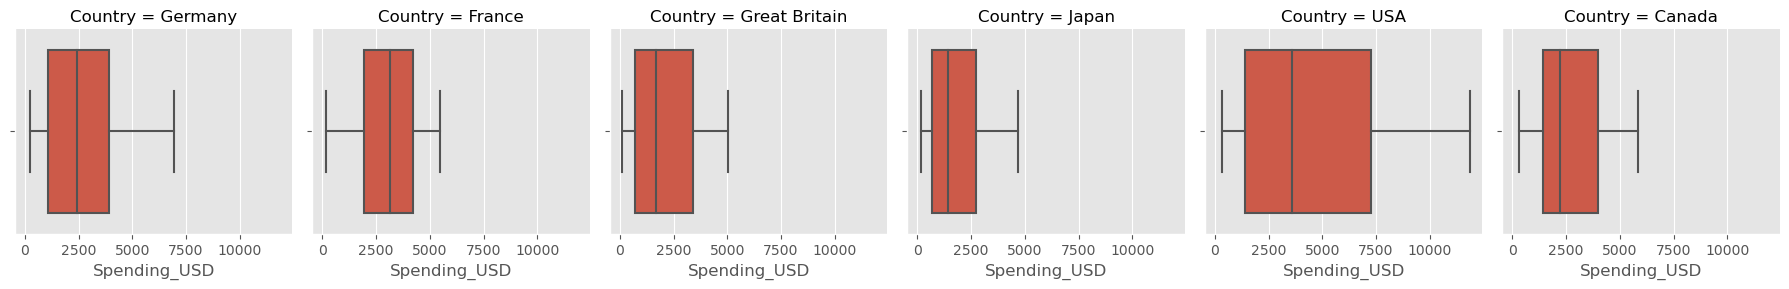

In [93]:
#Create box-plots to compare the relative health expenditures of the 6 countries
x = sns.FacetGrid(health,col='Country')
x.map(sns.boxplot, 'Spending_USD', order=['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'])


In [ ]:
#Comment on the boxplots you created in terms of the summary measures



In [ ]:
#It was been argued that health expenditures have increased significantly in the last 20 years.
#Create 3 periods corresponding to the following:
#Period 1 from 1970 to before 1990
#Period 2 from 1970 to before 2010
#Period 3 from 2010 onwards
#Create box plots to correspond to these periods to compare the health expenditures. Does the data support this argument?

In [108]:
def decade(year):
    if 1970 <= year <1990:
        return "Period1"
    elif 1990 <= year <2010:
        return "Period2"
    else:
        return "Period3"

In [109]:
health['Decade'] = [decade(x) for x in health['Year']]
health

,Year,Country,Spending_USD,Life_Expectancy,Decade
0,1970,Germany,252.311,70.6,Period1
1,1970,France,192.143,72.2,Period1
2,1970,Great Britain,123.993,71.9,Period1
3,1970,Japan,150.437,72.0,Period1
4,1970,USA,326.961,70.9,Period1
...,...,...,...,...,...
269,2020,Germany,6938.983,81.1,Period3
270,2020,France,5468.418,82.3,Period3
271,2020,Great Britain,5018.700,80.4,Period3
272,2020,Japan,4665.641,84.7,Period3


In [112]:
health["PeriodA"] = pd.Series(['Period1' if (1970 <= year < 1990) else 'Period2' if (1990 <= year < 2010) else 'Period3' for year in health['Year']])
health.head()

,Year,Country,Spending_USD,Life_Expectancy,Decade,PeriodA
0,1970,Germany,252.311,70.6,Period1,Period1
1,1970,France,192.143,72.2,Period1,Period1
2,1970,Great Britain,123.993,71.9,Period1,Period1
3,1970,Japan,150.437,72.0,Period1,Period1
4,1970,USA,326.961,70.9,Period1,Period1


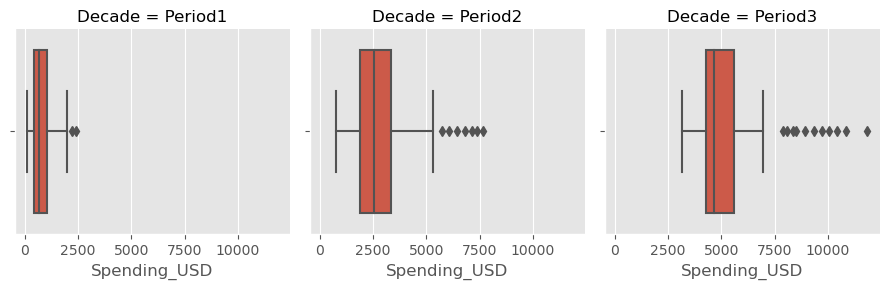

In [111]:
y = sns.FacetGrid(health, col = 'Decade')
y.map(sns.boxplot, 'Spending_USD', order = ['Period1', 'Period2', 'Period3'])

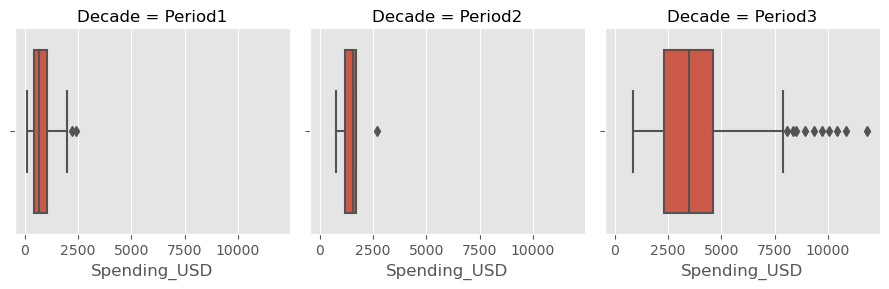

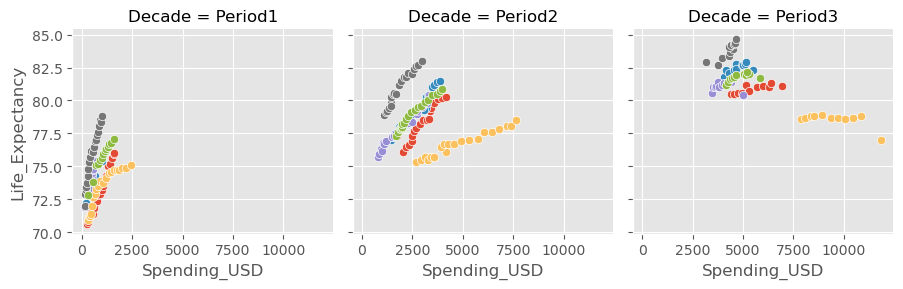

In [125]:
g = sns.FacetGrid(health, col = 'Decade', hue='Country')
g.map(sns.scatterplot,'Spending_USD','Life_Expectancy')

<Axes: >

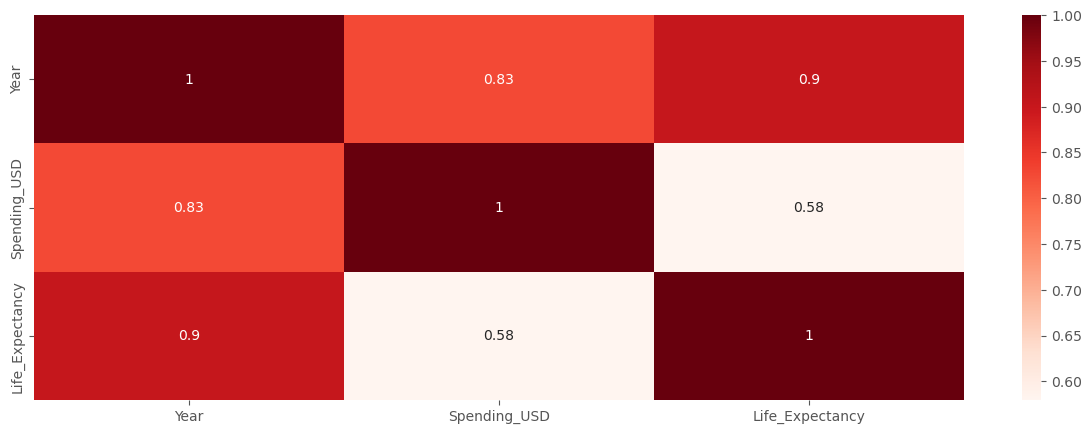

In [132]:
dataplot = sns.heatmap(data = health.corr(numeric_only=True), annot=True, cmap='Reds')
dataplot